In [26]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [27]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [28]:
def displayDBSCAN(epsilon, minimumSamples):
    
    # Initialize DBSCAN with specified epsilon and min. smaples. Fit the model with feature
    # matrix X
    db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
    
    # Create an array of booleans using the labels from db.
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    
    # Replace all elements with 'True' in core_samples_mask that are
    # in the cluster, 'False' if the points are outliers.
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


    # Black color is removed and used for noise instead.
    
    # Remove repetition in labels by turning it into a set.
    unique_labels = set(labels)
    
    # Create colors for the clusters.
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    # Plot the points with colors
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)
        
        # Plot the datapoints that are clustered
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        # Plot the outliers
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

In [29]:
X,y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

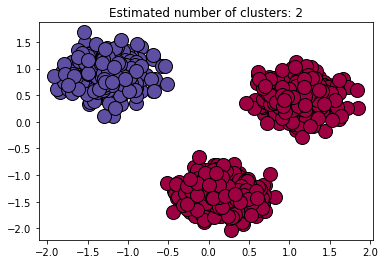

In [30]:
displayDBSCAN(1, 1)